In [2]:
import pandas as pd
import numpy as np

In [27]:
df_1 = pd.read_csv('yifeisun_si618_project1_AverageRevenue.tsv', sep='\t')
df_1 = df_1[["Unnamed: 0","Genre:","Action","0.0"]]
df_1.columns = ["Year","Kind","Value","Revenue"]
df_1 = df_1.dropna()
df_1["Year"] = df_1["Year"].astype(int)
df_1

,Year,Kind,Value,Revenue
22,1874,Genre:,Documentary,0.0
23,1874,Language:,No Language,0.0
24,1878,Genre:,Documentary,0.0
25,1878,Language:,No Language,0.0
26,1883,Genre:,Documentary,0.0
...,...,...,...,...
4268,2020,Genre:,Action,0.0
4269,2020,Genre:,Adventure,0.0
4270,2020,Genre:,Fantasy,0.0
4271,2020,Genre:,Science Fiction,0.0


In [36]:
df_1_1 = df_1[df_1["Revenue"] != 0]
df_1_Genre = df_1_1[df_1_1["Kind"] == "Genre:"]
df_1_Genre = df_1_Genre[["Year","Value","Revenue"]]
df_1_Genre.columns = ["Year","Genre","Revenue"]
df_1_Genre.index = df_1_Genre.reset_index().index
df_1_Genre

,Year,Genre,Revenue
0,1915,Drama,795526.07
1,1915,History,5500000.00
2,1915,War,2750000.00
3,1916,Action,8000000.00
4,1916,Adventure,4000000.00
...,...,...,...
1275,2017,Romance,32243623.65
1276,2017,Science Fiction,56436314.59
1277,2017,Thriller,37829810.51
1278,2017,War,67032918.24


In [144]:
df_cpi = pd.read_csv('US CPI.csv')
df_cpi["Year"]=df_cpi["Yearmon"].apply(lambda x: x[-4:])
df_cpi = df_cpi.drop_duplicates(subset=['Year'])
df_cpi['Year'] = df_cpi['Year'].astype(int)
df_cpi

,Yearmon,CPI,Year
0,01-01-1913,9.800,1913
12,01-01-1914,10.000,1914
24,01-01-1915,10.100,1915
36,01-01-1916,10.400,1916
48,01-01-1917,11.700,1917
...,...,...,...
1248,01-01-2017,242.839,2017
1260,01-01-2018,247.867,2018
1272,01-01-2019,251.712,2019
1284,01-01-2020,257.971,2020


In [148]:
df_1_Genre_adjusted = df_1_Genre.merge(df_cpi,on="Year")
df_1_Genre_adjusted["Revenue"] = df_1_Genre_adjusted["Revenue"]/df_1_Genre_adjusted["CPI"]
df_1_Genre_adjusted = df_1_Genre_adjusted[["Year","Genre","Revenue"]]
df_1_Genre_adjusted.columns=["Year","Genre","Adjusted Revenue"]
df_1_Genre_adjusted

,Year,Genre,Adjusted Revenue
0,1915,Drama,78764.957426
1,1915,History,544554.455446
2,1915,War,272277.227723
3,1916,Action,769230.769231
4,1916,Adventure,384615.384615
...,...,...,...
1275,2017,Romance,132777.781370
1276,2017,Science Fiction,232402.186593
1277,2017,Thriller,155781.445773
1278,2017,War,276038.520337


In [151]:
df_1_Genre_adjusted_dict_year = {}
for year in list(set(list(df_1_Genre_adjusted["Year"]))):
    df_1_Genre_adjusted_dict_year[year] = df_1_Genre_adjusted[df_1_Genre_adjusted["Year"] == year]

In [159]:
df_1_Genre_adjusted_dict_genre = {}
for genre in list(set(list(df_1_Genre_adjusted["Genre"]))):
    df_1_Genre_adjusted_dict_genre[genre] = df_1_Genre_adjusted[df_1_Genre_adjusted["Genre"] == genre]

In [157]:
dict_1 = {}
for genre in df_1_Genre_dict_genre:
    dict_1[genre] = [0,0]
for year in df_1_Genre_adjusted_dict_year.keys():
    df = df_1_Genre_adjusted_dict_year[year].sort_values("Adjusted Revenue",ascending=False)
    df["Rank"] = df.reset_index().index+1
    for genre in df_1_Genre_dict_genre.keys():
        if genre in list(df["Genre"]):
            dict_1[genre][0] += df[df["Genre"]==genre]["Rank"].values[0]
            dict_1[genre][1] += 1
        else:
            dict_1[genre][0] += len(df)+1
            dict_1[genre][1] += 1
dict_2 = {}
for genre in dict_1.keys():
    dict_2[genre] = dict_1[genre][0]/dict_1[genre][1]
list_1_a = sorted(dict_2.items(), key=lambda item: item[1])
list_1_5_a = [i[0] for i in list_1_a[:5]]
list_2_5_a = [i[0] for i in list_1_a[5:10]]
list_3_5_a = [i[0] for i in list_1_a[10:15]]
list_4_5_a = [i[0] for i in list_1_a[15:]]

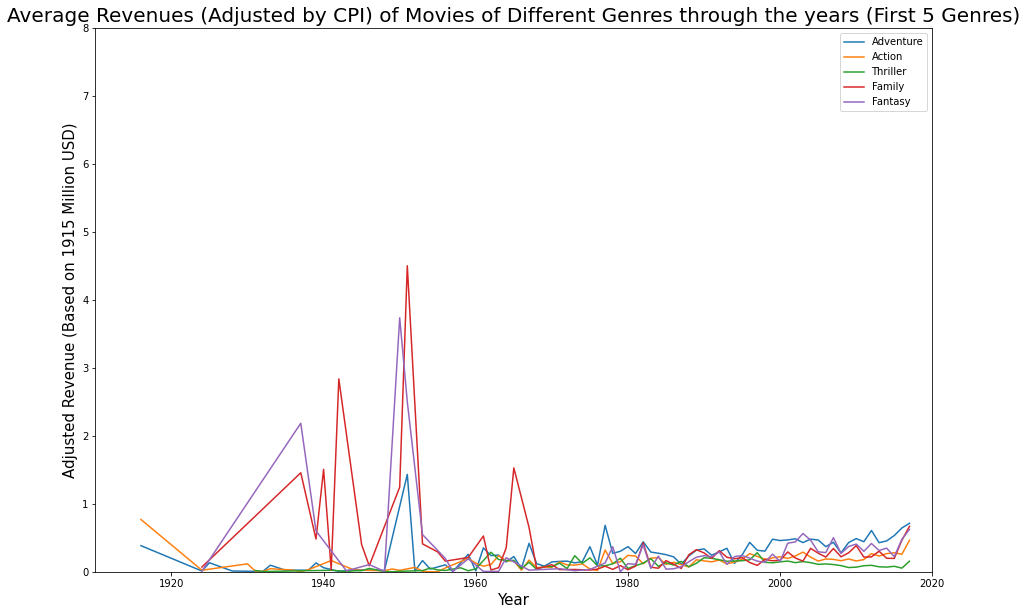

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_1_5_a:
        df = df_1_Genre_adjusted_dict_genre[genre]
        plt.plot(df["Year"], df["Adjusted Revenue"]/1e6, label = genre)
plt.title("Average Revenues (Adjusted by CPI) of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Revenue (Based on 1915 Million USD)", fontsize=15)
plt.ylim([0, 8])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

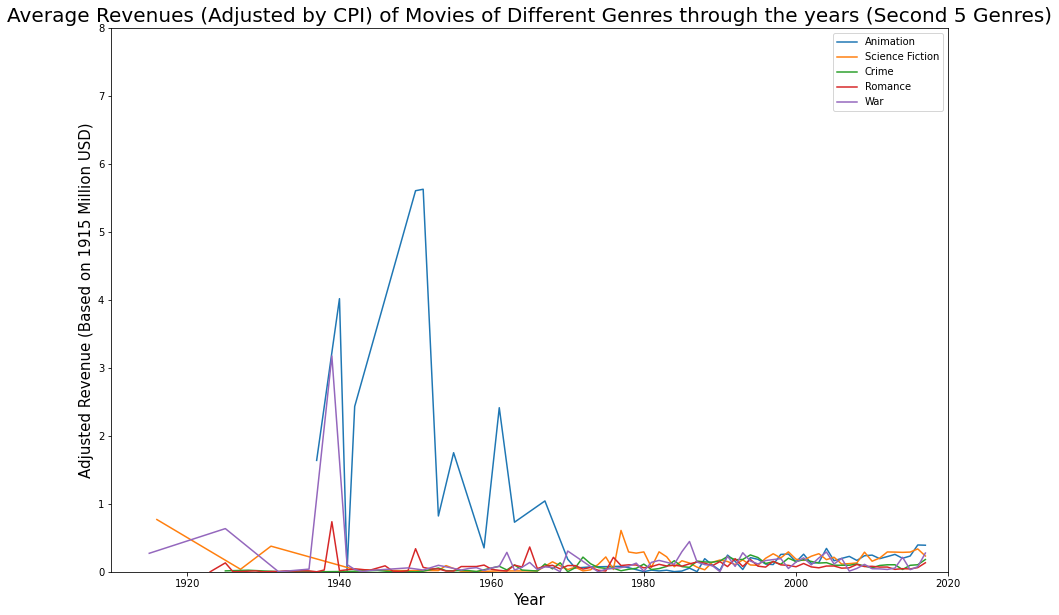

In [173]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_2_5_a:
        df = df_1_Genre_adjusted_dict_genre[genre]
        plt.plot(df["Year"], df["Adjusted Revenue"]/1e6, label = genre)
plt.title("Average Revenues (Adjusted by CPI) of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Revenue (Based on 1915 Million USD)", fontsize=15)
plt.ylim([0, 8])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

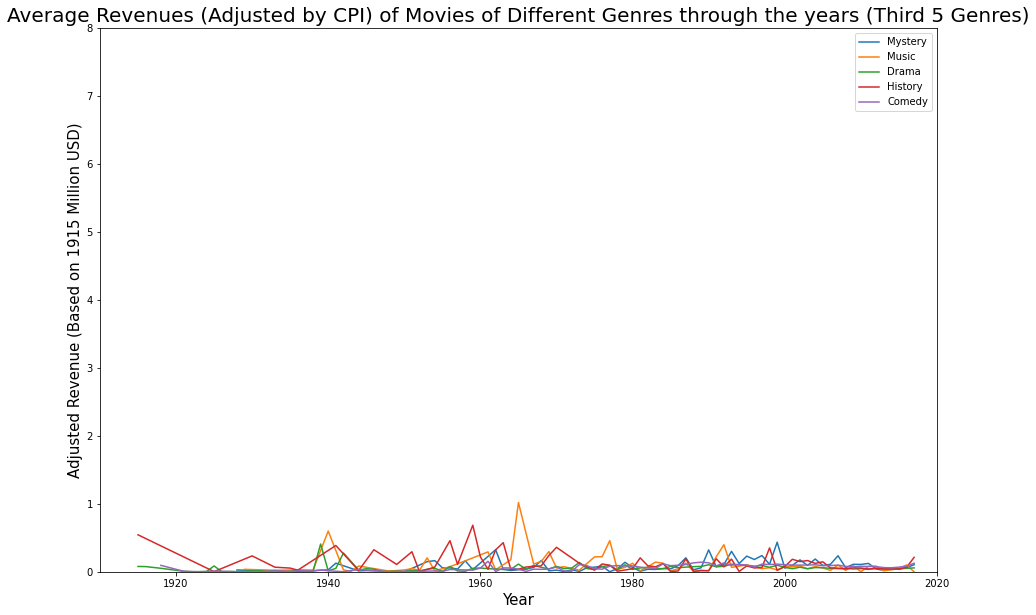

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_3_5_a:
        df = df_1_Genre_adjusted_dict_genre[genre]
        plt.plot(df["Year"], df["Adjusted Revenue"]/1e6, label = genre)
plt.title("Average Revenues (Adjusted by CPI) of Movies of Different Genres through the years (Third 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Revenue (Based on 1915 Million USD)", fontsize=15)
plt.ylim([0, 8])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

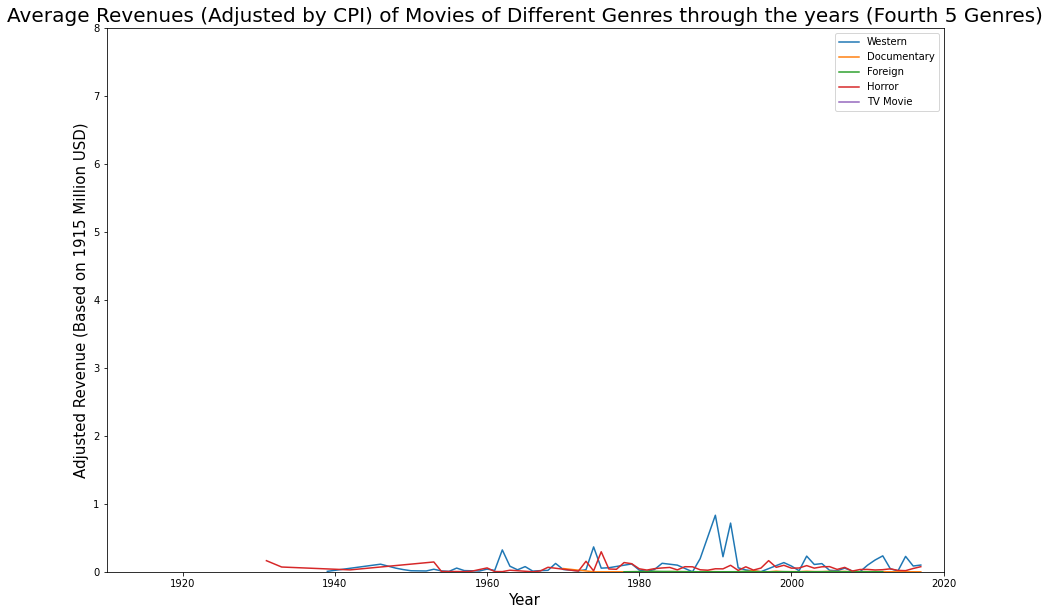

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_4_5_a:
        df = df_1_Genre_adjusted_dict_genre[genre]
        plt.plot(df["Year"], df["Adjusted Revenue"]/1e6, label = genre)
plt.title("Average Revenues (Adjusted by CPI) of Movies of Different Genres through the years (Fourth 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Revenue (Based on 1915 Million USD)", fontsize=15)
plt.ylim([0, 8])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

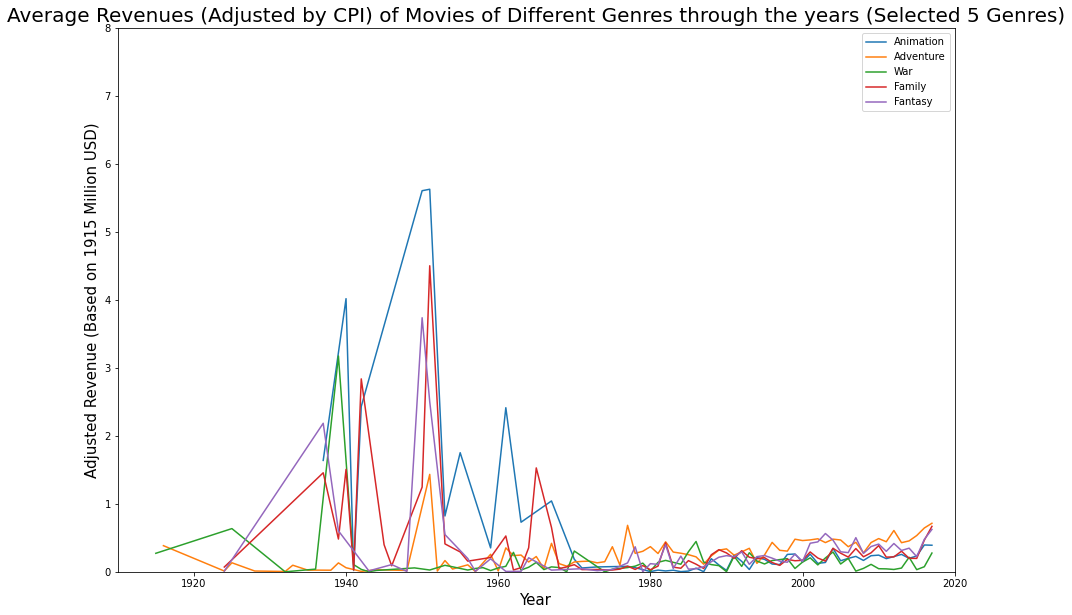

In [176]:
list_defined = ["War","Animation","Family","Fantasy","Adventure"]
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_defined:
        df = df_1_Genre_adjusted_dict_genre[genre]
        plt.plot(df["Year"], df["Adjusted Revenue"]/1e6, label = genre)
plt.title("Average Revenues (Adjusted by CPI) of Movies of Different Genres through the years (Selected 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Revenue (Based on 1915 Million USD)", fontsize=15)
plt.ylim([0, 8])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

In [152]:
df_1_Genre_dict_year = {}
for year in list(set(list(df_1_Genre["Year"]))):
    df_1_Genre_dict_year[year] = df_1_Genre[df_1_Genre["Year"] == year]

In [59]:
df_1_Genre_dict_genre = {}
for genre in list(set(list(df_1_Genre["Genre"]))):
    df_1_Genre_dict_genre[genre] = df_1_Genre[df_1_Genre["Genre"] == genre]

In [118]:
dict_1 = {}
for genre in df_1_Genre_dict_genre:
    dict_1[genre] = [0,0]
for year in df_1_Genre_dict_year.keys():
    df = df_1_Genre_dict_year[year].sort_values("Revenue",ascending=False)
    df["Rank"] = df.reset_index().index+1
    for genre in df_1_Genre_dict_genre.keys():
        if genre in list(df["Genre"]):
            dict_1[genre][0] += df[df["Genre"]==genre]["Rank"].values[0]
            dict_1[genre][1] += 1
        else:
            dict_1[genre][0] += len(df)+1
            dict_1[genre][1] += 1
dict_2 = {}
for genre in dict_1.keys():
    dict_2[genre] = dict_1[genre][0]/dict_1[genre][1]
list_1 = sorted(dict_2.items(), key=lambda item: item[1])
list_1_5 = [i[0] for i in list_1[:5]]
list_2_5 = [i[0] for i in list_1[5:10]]
list_3_5 = [i[0] for i in list_1[10:15]]
list_4_5 = [i[0] for i in list_1[15:]]

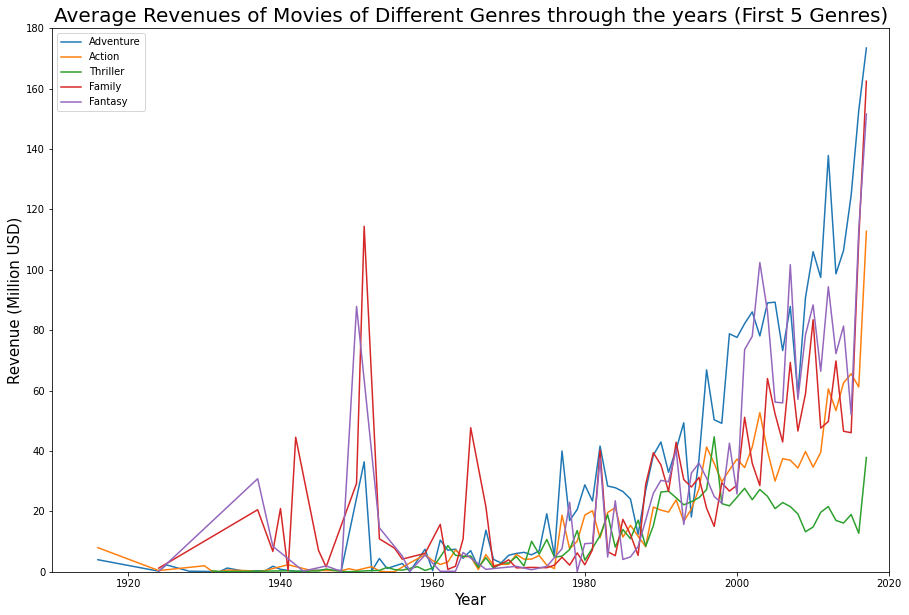

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_1_5:
        df = df_1_Genre_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue"]/1e6, label = genre)
plt.title("Average Revenues of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue (Million USD)", fontsize=15)
plt.ylim([0, 180])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

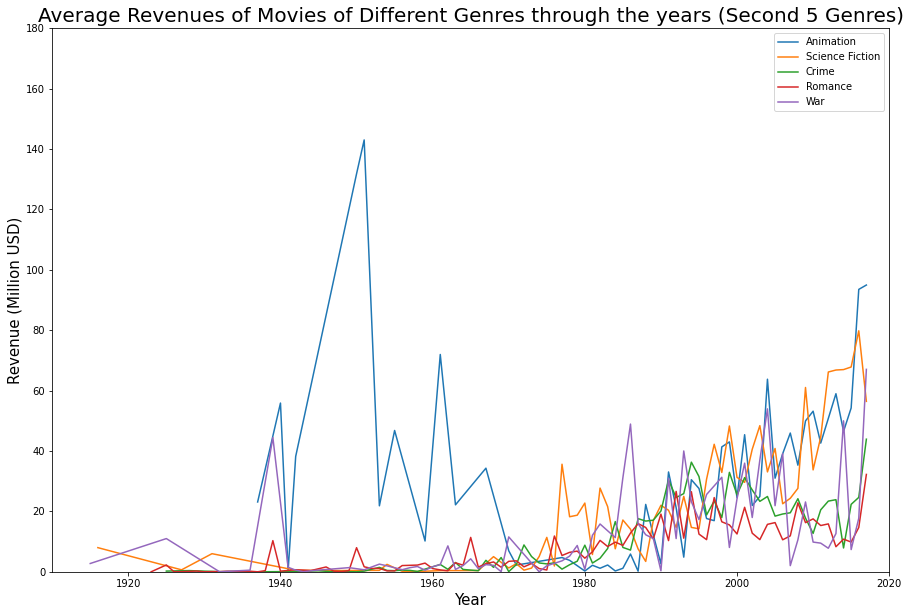

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_2_5:
        df = df_1_Genre_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue"]/1e6, label = genre)
plt.title("Average Revenues of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue (Million USD)", fontsize=15)
plt.ylim([0, 180])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

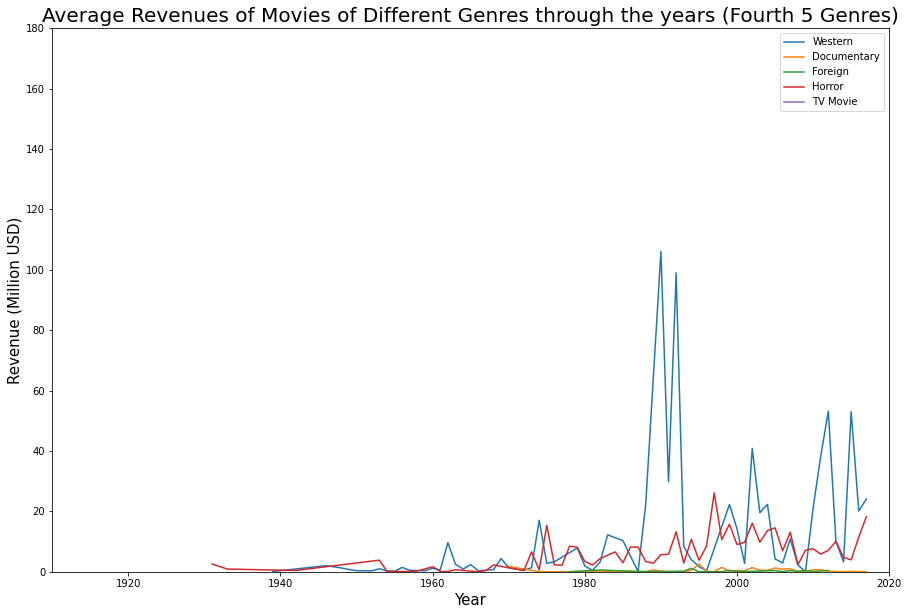

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_4_5:
        df = df_1_Genre_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue"]/1e6, label = genre)
plt.title("Average Revenues of Movies of Different Genres through the years (Fourth 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue (Million USD)", fontsize=15)
plt.ylim([0, 180])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

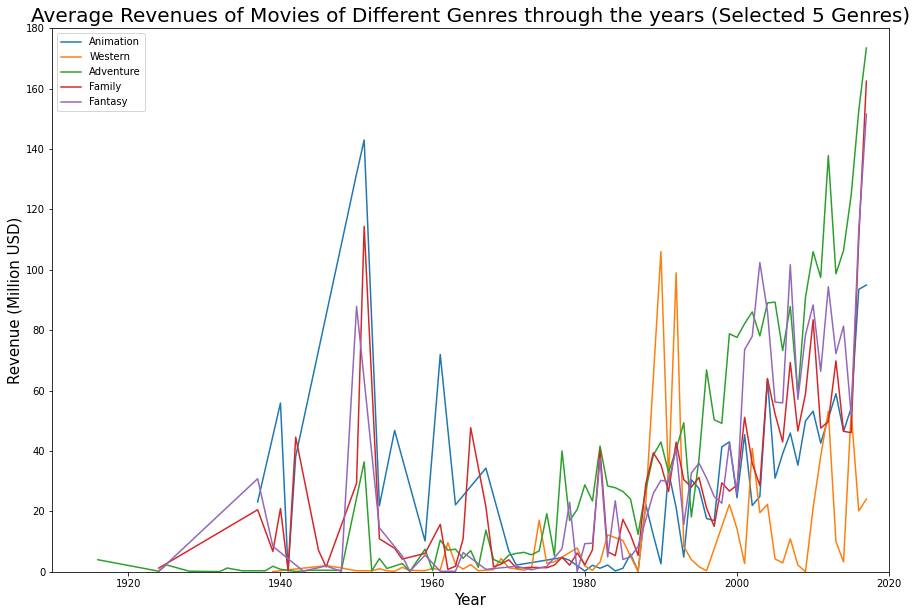

In [132]:
list_defined = ["Western","Animation","Family","Fantasy","Adventure"]
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_defined:
        df = df_1_Genre_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue"]/1e6, label = genre)
plt.title("Average Revenues of Movies of Different Genres through the years (Selected 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue (Million USD)", fontsize=15)
plt.ylim([0, 180])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

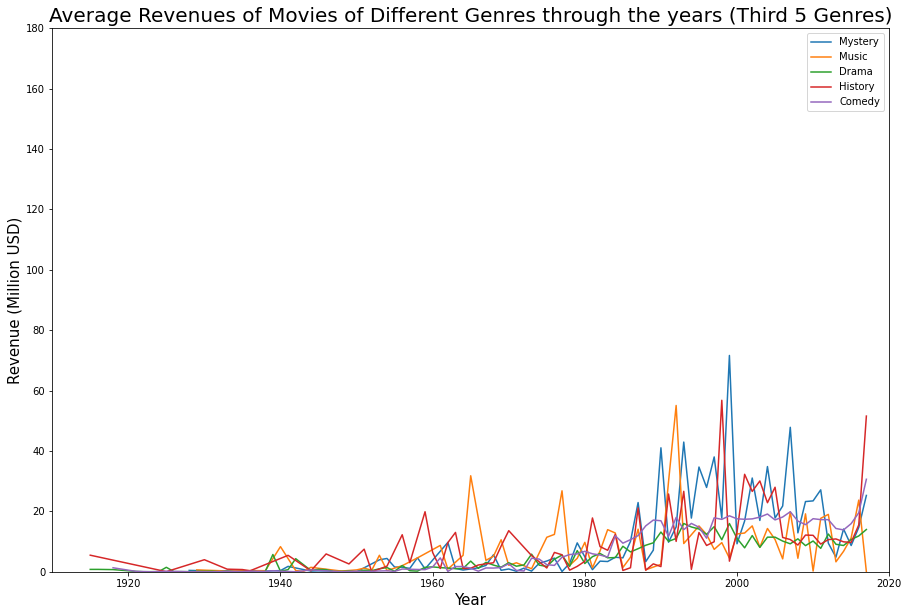

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in df_1_Genre_dict_genre.keys():
    if genre in list_3_5:
        df = df_1_Genre_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue"]/1e6, label = genre)
plt.title("Average Revenues of Movies of Different Genres through the years (Third 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue (Million USD)", fontsize=15)
plt.ylim([0, 180])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

In [37]:
df_1_2 = df_1[df_1["Revenue"] != 0]
df_1_Language = df_1_2[df_1_2["Kind"] == "Language:"]
df_1_Language = df_1_Language[["Year","Value","Revenue"]]
df_1_Language.columns = ["Year","Language","Revenue"]
df_1_Language.index = df_1_Language.reset_index().index
df_1_Language

,Year,Language,Revenue
0,1915,No Language,2750000.00
1,1916,English,888888.89
2,1918,English,2000000.00
3,1921,No Language,500000.00
4,1922,No Language,133400.00
...,...,...,...
700,2017,தமிழ்,82333333.33
701,2017,广州话 / 廣州話,33513935.33
702,2017,日本語,33960384.20
703,2017,한국어/조선말,11220000.00


In [178]:
df_1_Language_adjusted = df_1_Language.merge(df_cpi,on="Year")
df_1_Language_adjusted["Revenue"] = df_1_Language_adjusted["Revenue"]/df_1_Language_adjusted["CPI"]
df_1_Language_adjusted = df_1_Language_adjusted[["Year","Language","Revenue"]]
df_1_Language_adjusted.columns=["Year","Language","Adjusted Revenue"]
df_1_Language_adjusted

,Year,Language,Adjusted Revenue
0,1915,No Language,272277.227723
1,1916,English,85470.085577
2,1918,English,142857.142857
3,1921,No Language,26315.789474
4,1922,No Language,7893.491124
...,...,...,...
700,2017,தமிழ்,339044.936481
701,2017,广州话 / 廣州話,138008.867315
702,2017,日本語,139847.323535
703,2017,한국어/조선말,46203.451670


In [179]:
df_1_Language_dict_year = {}
for year in list(set(list(df_1_Language["Year"]))):
    df_1_Language_dict_year[year] = df_1_Language[df_1_Language["Year"] == year]

In [182]:
df_1_Language_adjusted_dict_year = {}
for year in list(set(list(df_1_Language_adjusted["Year"]))):
    df_1_Language_adjusted_dict_year[year] = df_1_Language_adjusted[df_1_Language_adjusted["Year"] == year]

In [190]:
df_1_Language_dict_language = {}
for language in list(set(list(df_1_Language["Language"]))):
    df_1_Language_dict_language[language] = df_1_Language[df_1_Language["Language"] == language]

In [185]:
df_1_Language_adjusted_dict_language = {}
for langauge in list(set(list(df_1_Language_adjusted["Language"]))):
    df_1_Language_adjusted_dict_language[langauge] = df_1_Language_adjusted[df_1_Language_adjusted["Language"] == langauge]

In [205]:
dict_1 = {}
for langauge in df_1_Language_dict_langauge:
    dict_1[langauge] = [0,0]
for year in df_1_Language_adjusted_dict_year.keys():
    df = df_1_Language_adjusted_dict_year[year].sort_values("Adjusted Revenue",ascending=False)
    df["Rank"] = df.reset_index().index+1
    for langauge in df_1_Language_dict_langauge.keys():
        if langauge in list(df["Language"]):
            dict_1[langauge][0] += df[df["Language"]==langauge]["Rank"].values[0]
            dict_1[langauge][1] += 1
        else:
            dict_1[langauge][0] += len(df)+1
            dict_1[langauge][1] += 1
dict_2 = {}
for langauge in dict_1.keys():
    dict_2[langauge] = dict_1[langauge][0]/dict_1[langauge][1]
list_1_a = sorted(dict_2.items(), key=lambda item: item[1])
list_1_10_a = [i[0] for i in list_1_a[:10]]
list_2_10_a = [i[0] for i in list_1_a[10:20]]
list_3_10_a = [i[0] for i in list_1_a[20:30]]
list_4_10_a = [i[0] for i in list_1_a[30:40]]
list_5_10_a = [i[0] for i in list_1_a[40:50]]

In [210]:
list_2_10_a

['हिन्दी',
 'Italiano',
 'தமிழ்',
 'Latin',
 'Português',
 '한국어/조선말',
 'Dansk',
 'עִבְרִית',
 'svenska',
 'Magyar']

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPyt

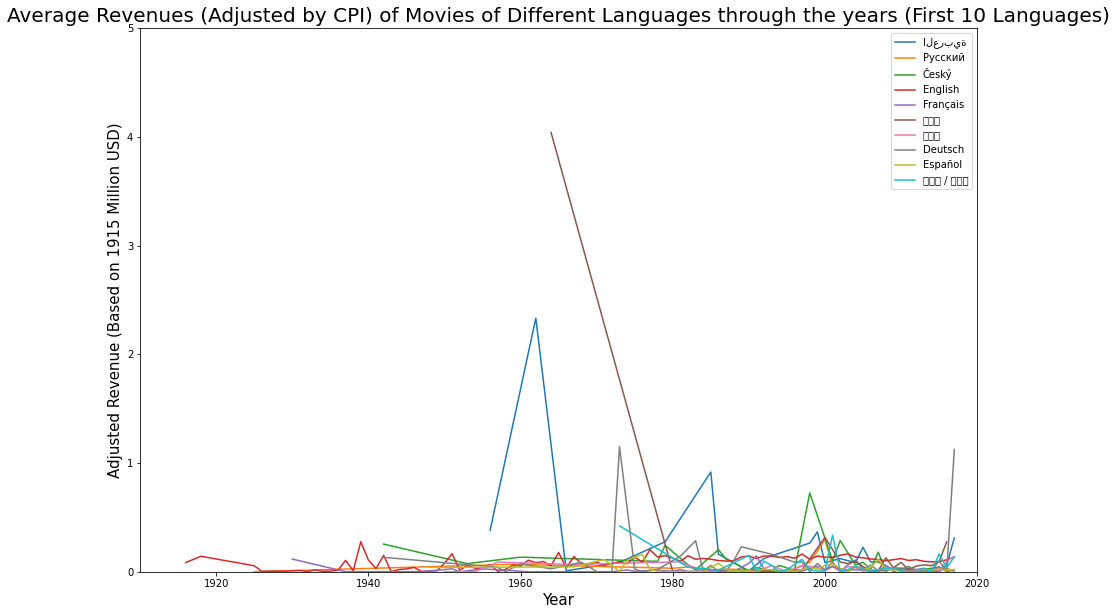

In [209]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for language in df_1_Language_dict_language.keys():
    if language in list_1_10_a:
        df = df_1_Language_adjusted_dict_language[language]
        plt.plot(df["Year"], df["Adjusted Revenue"]/1e6, label = language)
plt.title("Average Revenues (Adjusted by CPI) of Movies of Different Languages through the years (First 10 Languages)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Revenue (Based on 1915 Million USD)", fontsize=15)
plt.ylim([0, 5])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

In [221]:
import matplotlib
print(matplotlib.matplotlib_fname())

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [220]:
import matplotlib
print([f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name])

[]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2996

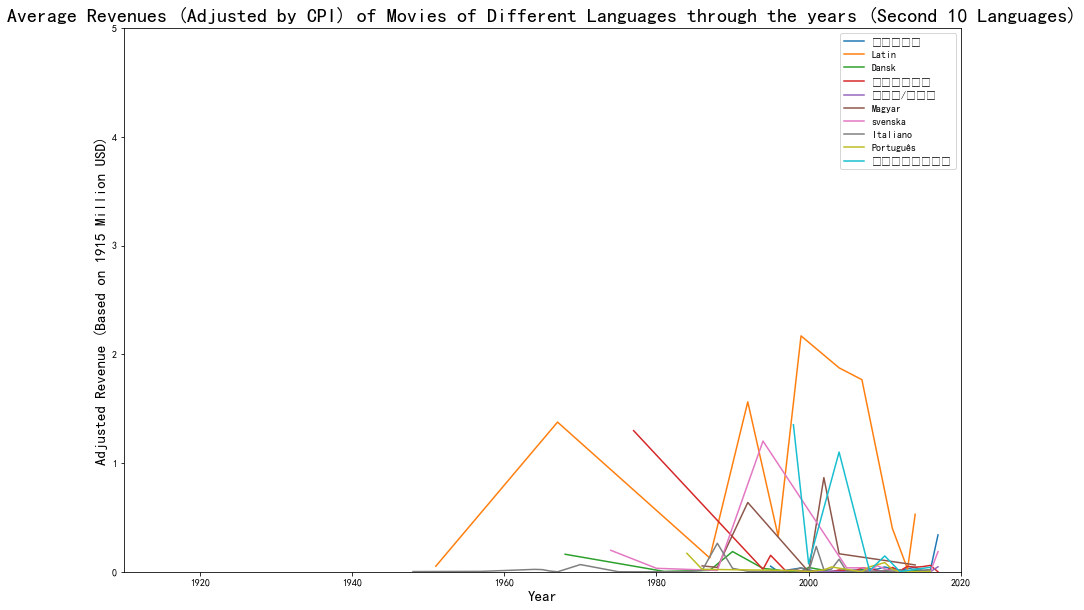

In [219]:


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for language in df_1_Language_dict_language.keys():
    if language in list_2_10_a:
        df = df_1_Language_adjusted_dict_language[language]
        plt.plot(df["Year"], df["Adjusted Revenue"]/1e6, label = language)
plt.title("Average Revenues (Adjusted by CPI) of Movies of Different Languages through the years (Second 10 Languages)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Revenue (Based on 1915 Million USD)", fontsize=15)
plt.ylim([0, 5])
plt.xlim([1910, 2020])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.legend()
plt.show()

In [211]:
dict_1 = {}
for langauge in df_1_Language_dict_langauge:
    dict_1[langauge] = [0,0]
for year in df_1_Language_dict_year.keys():
    df = df_1_Language_dict_year[year].sort_values("Revenue",ascending=False)
    df["Rank"] = df.reset_index().index+1
    for langauge in df_1_Language_dict_langauge.keys():
        if langauge in list(df["Language"]):
            dict_1[langauge][0] += df[df["Language"]==langauge]["Rank"].values[0]
            dict_1[langauge][1] += 1
        else:
            dict_1[langauge][0] += len(df)+1
            dict_1[langauge][1] += 1
dict_2 = {}
for langauge in dict_1.keys():
    dict_2[langauge] = dict_1[langauge][0]/dict_1[langauge][1]
list_1 = sorted(dict_2.items(), key=lambda item: item[1])
list_1_10 = [i[0] for i in list_1[:10]]
list_2_10 = [i[0] for i in list_1[10:20]]
list_3_10 = [i[0] for i in list_1[20:30]]
list_4_10 = [i[0] for i in list_1[30:40]]
list_5_10 = [i[0] for i in list_1[40:50]]

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPyt

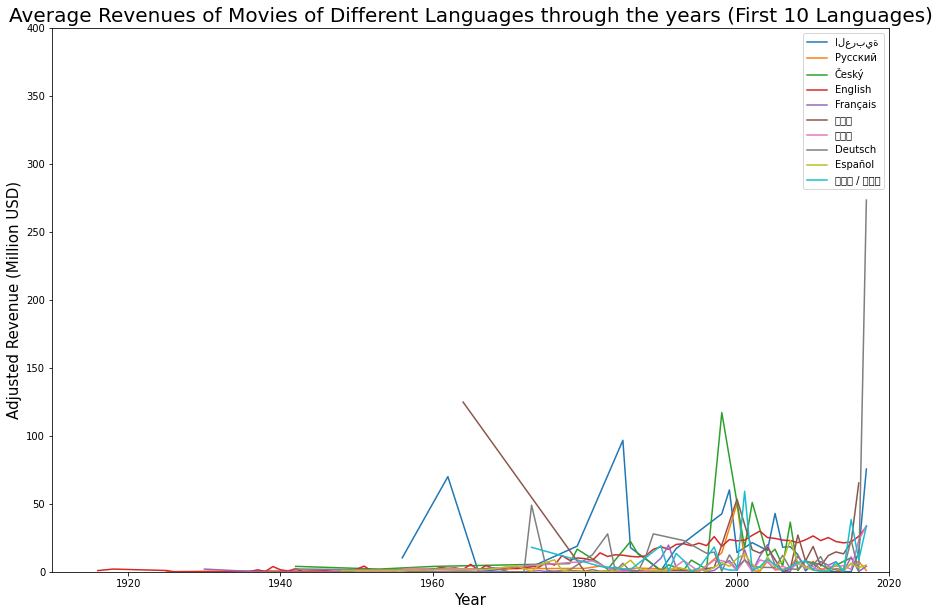

In [215]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for language in df_1_Language_dict_language.keys():
    if language in list_1_10:
        df = df_1_Language_dict_language[language]
        plt.plot(df["Year"], df["Revenue"]/1e6, label = language)
plt.title("Average Revenues of Movies of Different Languages through the years (First 10 Languages)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Revenue (Million USD)", fontsize=15)
plt.ylim([0, 400])
plt.xlim([1910, 2020])
plt.legend()
plt.show()